In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from cluster_generator import HydrostaticEquilibrium, VirialEquilibrium, ClusterModel, ClusterParticles
import numpy as np

In [3]:
# beta density profile
n_0 = 3.9e-3 # in per cc
rho_c = n_0/40.*1e9 # in Msun/kpc**3
beta = 0.75
r_c = 272.0 # in kpc

# temperature profile
t_0 = 8.5
r_t = 1300

In [4]:
gas_density = lambda r: rho_c*(1+(r/r_c)**2)**(-1.5*beta)
tem_prof = lambda r: t_0*(1+(r/r_t)**2)**-0.45

In [5]:
rmin = 0.1 # kpc
rmax = 10000.0 # kpc
profiles = {"density": gas_density, "temperature": tem_prof}
hse_model = HydrostaticEquilibrium.from_scratch("dens_temp", rmin, rmax, profiles, T_amb=1.0e5)

yt : [INFO     ] 2018-02-16 16:14:21,908 Computing the profiles from density and temperature.
yt : [INFO     ] 2018-02-16 16:14:21,976 Integrating gravitational potential profile.
yt : [INFO     ] 2018-02-16 16:14:26,092 Integrating gas mass profile.


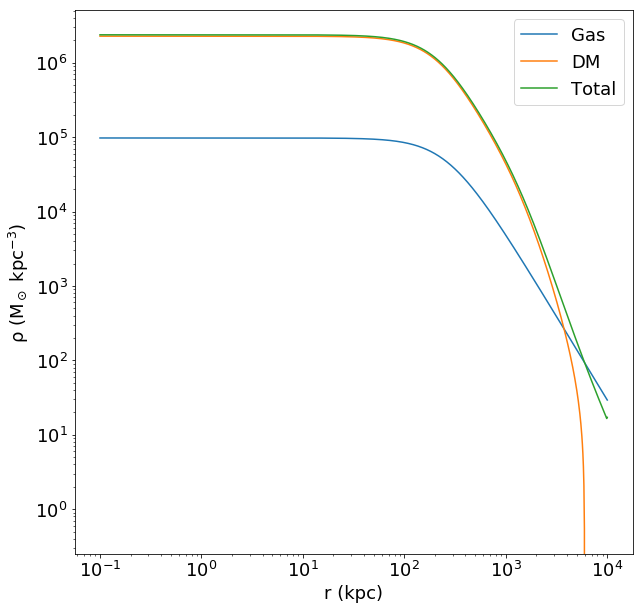

In [6]:
plt.rc("font", size=18)
plt.figure(figsize=(10,10))
plt.loglog(hse_model["radius"], hse_model["density"], label="Gas")
plt.loglog(hse_model["radius"], hse_model["dark_matter_density"], label="DM")
plt.loglog(hse_model["radius"], hse_model["total_density"], label="Total")
plt.xlabel("r (kpc)")
plt.ylabel(r"$\mathrm{\rho\ (M_\odot\ kpc^{-3})}$")
plt.legend()

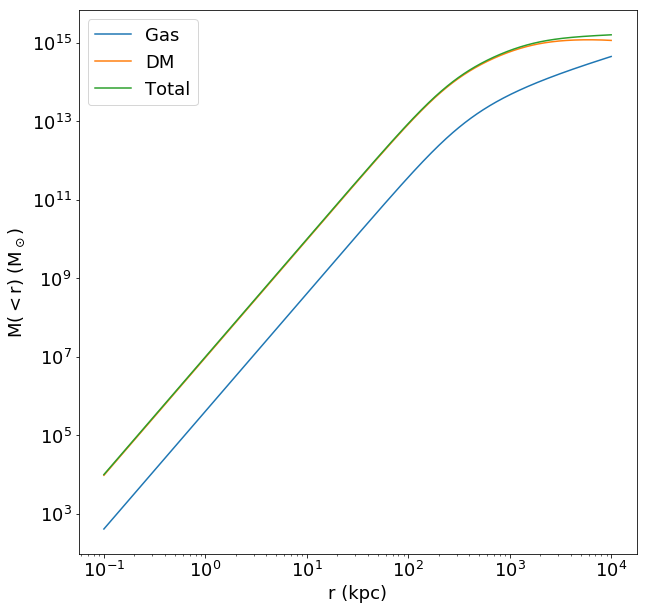

In [7]:
plt.figure(figsize=(10,10))
plt.loglog(hse_model["radius"], hse_model["gas_mass"], label="Gas")
plt.loglog(hse_model["radius"], hse_model["dark_matter_mass"], label="DM")
plt.loglog(hse_model["radius"], hse_model["total_mass"], label="Total")
plt.xlabel("r (kpc)")
plt.ylabel(r"$\mathrm{M(< r)\ (M_\odot)}$")
plt.legend()

(0.1, 10.0)

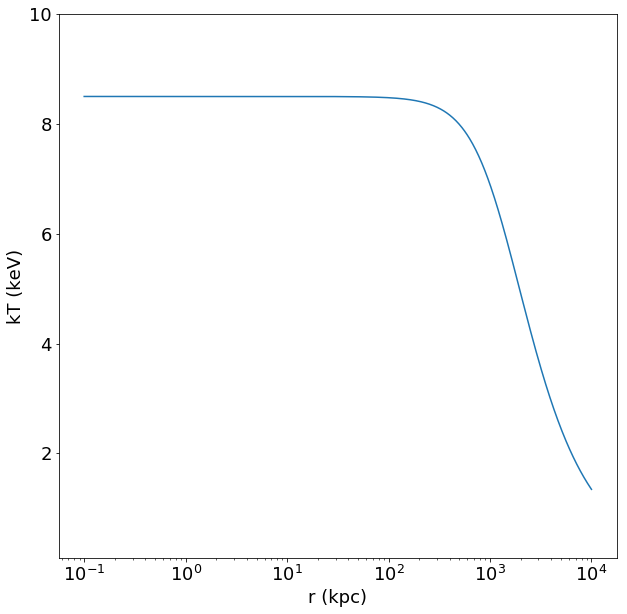

In [10]:
plt.figure(figsize=(10,10))
plt.plot(hse_model["radius"], hse_model["temperature"])
plt.xscale('log')
plt.xlabel("r (kpc)")
plt.ylabel("kT (keV)")
plt.ylim(0.1, 10.0)